In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1' 
sys.path.insert(0,my_path + r'\code\COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt
from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

In [3]:
from outliers import handle_outliers

# handle outliers
X_raw, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

-999 are replaced by the mean value of the feature


In [4]:
# get feature names 
all_features_raw = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

In [5]:
from extend_features import extend_features

# feature degree
degree = 1

# extend feature set
all_candidates, features = extend_features(X_raw, all_features_raw, degree, is_add_log = True)
print(all_candidates.shape)

---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
(250000, 50)


In [9]:
# feature selection (best feature indices from the step wise with logistic regression)
indx = [1, 13, 4, 46, 0, 11, 44, 43, 7, 2, 16, 48, 10, 6, 49, 22, 45, 12, 19, 23, 32, 24, 17, 14, 39, 42, 30, 31, 47, 38, 20]

# thresholding to lower the number of feature
indx = indx[:17]

# training set
X = all_candidates[:, indx]

# optimal degree obtained from cross validation with different degrees in [1,10]  
degree_opt = 5

# build polynomial basis function
phi = build_poly(X, degree_opt)
        
# standardization
phi_tmp,_,_ =  standardize(phi[:,1:]) 
phi[:,1:] = phi_tmp

# Model estimation cross-validation

n_iter: 2500 , ||grad|| = 541.010492036


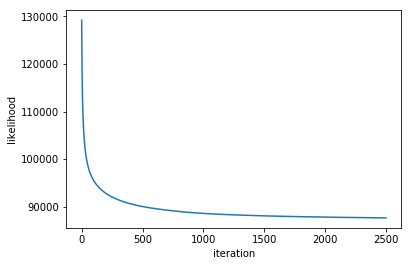

--------------------- final iteration


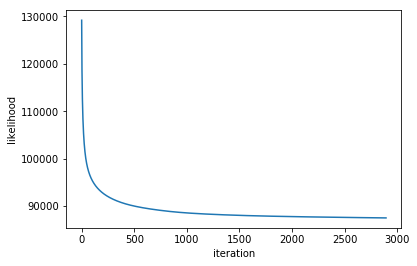

n_iter: 2500 , ||grad|| = 548.552453554


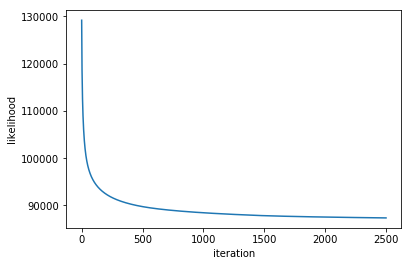

--------------------- final iteration


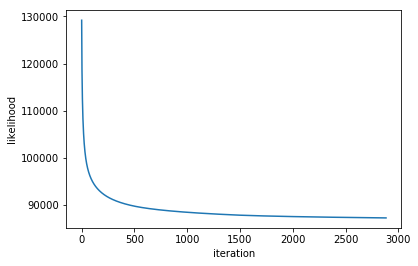

n_iter: 2500 , ||grad|| = 558.146927529


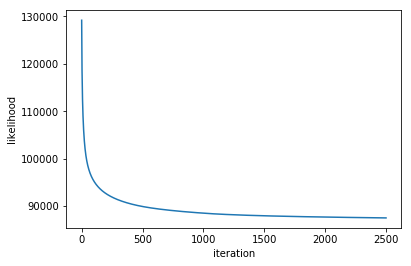

--------------------- final iteration


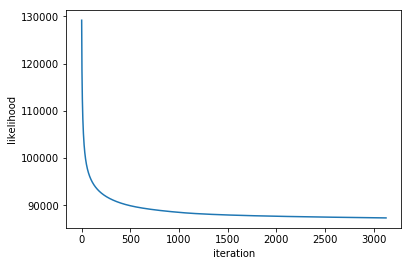

n_iter: 2500 , ||grad|| = 585.384748194


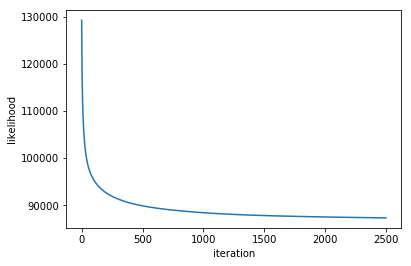

--------------------- final iteration


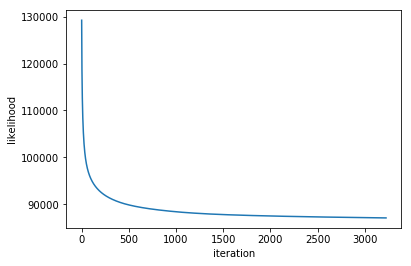

n_iter: 2500 , ||grad|| = 571.609222645


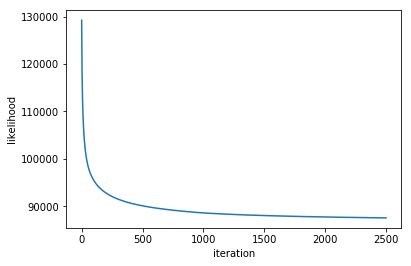

--------------------- final iteration


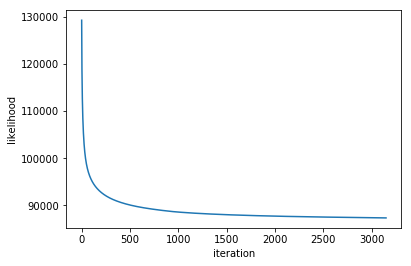

In [18]:
# model parameters
model = dict()
model['method'] = 'lr' # 'lrr' if regularized with a penalization 'lambda_' otherwise 'lr' 
model['loss'] = 'loglikelihood'

# other
model['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton' (newton descent leads to non invertible matrice "S" which is too big)
model['threshold'] = 500
model['gamma'] = 1e-6
model['initial_w'] = np.zeros(phi.shape[1])
model['max_iters'] = 10000
model['debug_mode'] = 1
model['k_fold'] = 5

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot, success_rate = cross_validation(y, phi, model)

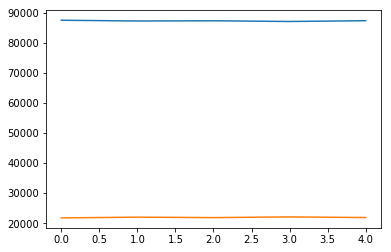

In [19]:
plt.figure()
plt.plot(loss_tr_tot)
plt.plot(loss_te_tot)
plt.show()

In [24]:
print('training losses: mean =', np.mean(loss_tr_tot), ',standard deviation =', np.std(loss_tr_tot))
print('testing losses: mean =', np.mean(loss_te_tot), ',standard deviation =', np.std(loss_te_tot))
print('success rate =',success_rate)

training losses: mean = 87299.4333971 ,standard deviation = 133.824819551
testing losses: mean = 21911.3668556 ,standard deviation = 118.528611483
success rate = 0.800844
